Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [ ]:
wine_dataset=pd.read_csv('/content/winequality-red.csv')
wine_dataset.shape

(1599, 12)

Data Visualization

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


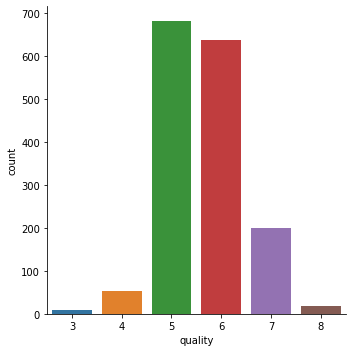

In [ ]:
#quality vs count
sns.catplot(x="quality",data=wine_dataset,kind="count")

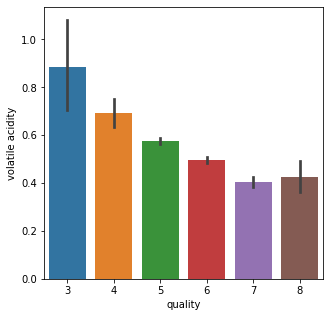

In [ ]:
#quality vs volatile acidity
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=wine_dataset)

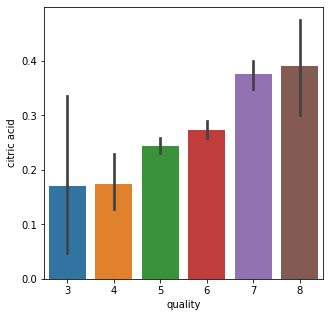

In [ ]:
#quality vs citric acid
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=wine_dataset)

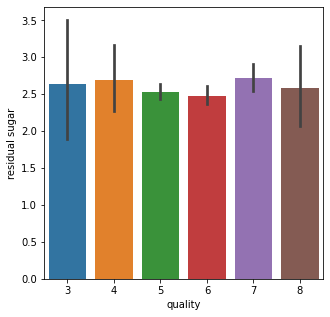

In [ ]:
#quality vs residual sugar
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="residual sugar",data=wine_dataset)

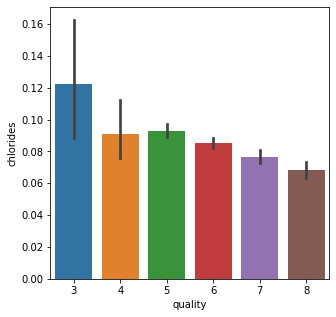

In [ ]:
#quality vs chlorides
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="chlorides",data=wine_dataset)

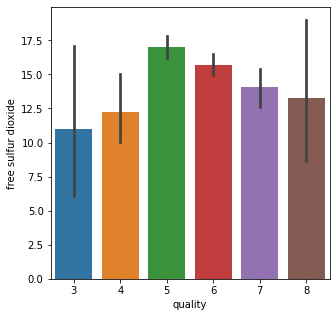

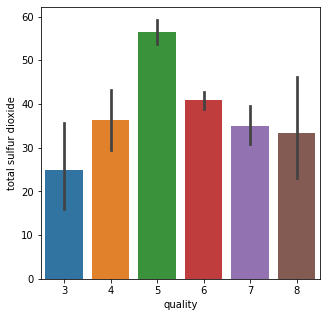

In [ ]:
#quality vs sulfur dioxide
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="free sulfur dioxide",data=wine_dataset)
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="total sulfur dioxide",data=wine_dataset)

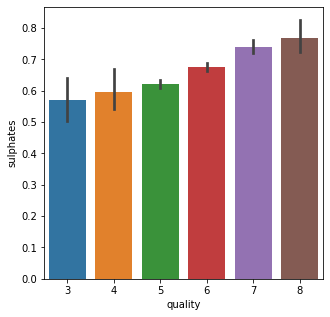

In [ ]:
#quality vs sulphates
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="sulphates",data=wine_dataset)

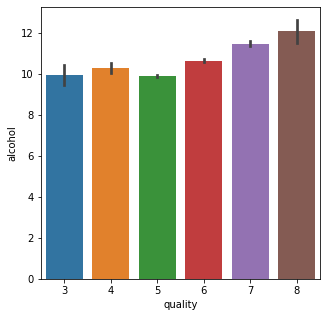

In [ ]:
#quality vs alcohol
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="alcohol",data=wine_dataset)

Correlation

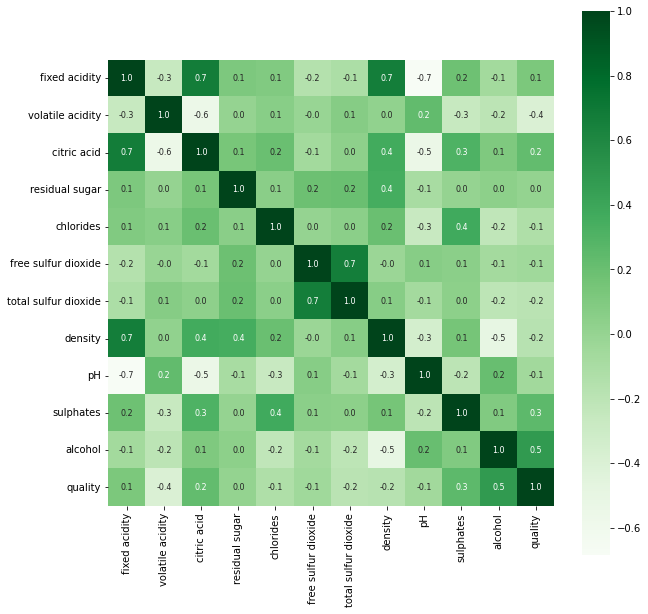

In [ ]:
#Drawing correlation heat map (Value changing with other variation on another field)
correlation=wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt="0.1f",annot=True,annot_kws={"size":8},cmap="Greens")

Data Preprocessing


In [ ]:
#Seperating Rest of data from quality
X=wine_dataset.drop("quality",axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Data Binarization(ie splitting data in 2 categories for Random forest as it is a categorical model)

In [ ]:
Y=wine_dataset["quality"].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model Training (random forest)

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluating The Model

In [ ]:
X_predict=model.predict(X_test)
accuracy=accuracy_score(X_predict,Y_test)
print("Accuracy Percentage =",accuracy*100,"%")

Accuracy Percentage = 92.8125 %


Using the model

In [ ]:
input=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#changing input data to numpy array
input_array=np.asarray(input)
#reshape data as u r using it for 1 example only
input_reshape=input_array.reshape(1,-1)

output=model.predict(input_reshape)
if output[0]==1:
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")


Good Quality Wine
